# Taghazout Data Overview and Exploration

#### The purpose of this notebook is to provide an overview of the crawler data, compute statistics on the data, and discover preliminary patterns within the data in order for effective variable analysing in the following notebook.

In [1]:
# Read CSV File 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import lines

filename = 'taghazout_surf_data.csv'

df = pd.read_csv(filename, parse_dates = True)

print df.columns

Index([u'date', u'swell_height_ft', u'swell_period_secs', u'wind_speed_mph',
       u'swell_dir', u'wind_dir'],
      dtype='object')


In [2]:
#convert date into datetime format
from datetime import datetime
import matplotlib.dates as mdates
dates = df["date"]
#type(dates)
#print dates
df["times"] = [datetime.strptime(d, '%Y/%d/%m') for d in dates]

In [3]:
#extract years
df["year"] = pd.DatetimeIndex(df["times"]).year
df["month"] = pd.DatetimeIndex(df["times"]).month

In [4]:
#convert feet to metres and attach it to df
swell_height = []
for i in range(0,len(df["date"])):
    swell_height.append(df["swell_height_ft"][i]*0.3048)
#print swell_height

#attach conversion to df
df["swell_height"] = swell_height

print df.head()

       date  swell_height_ft  swell_period_secs  wind_speed_mph  swell_dir  \
0  2007/1/1              8.4                 13               4        310   
1  2006/1/1              6.5                 13              13        300   
2  2005/1/1              6.0                 14               7        315   
3  2004/1/1              7.4                  6              25          5   
4  2003/1/1             10.4                 14               2        300   

   wind_dir      times  year  month  swell_height  
0       235 2007-01-01  2007      1       2.56032  
1        10 2006-01-01  2006      1       1.98120  
2       235 2005-01-01  2005      1       1.82880  
3        25 2004-01-01  2004      1       2.25552  
4       305 2003-01-01  2003      1       3.16992  


In [5]:
#create separate df for each year
#type(df['year'])
df_2007 = df.loc[df['year'] == 2007]
df_2006 = df.loc[df['year'] == 2006]
df_2005 = df.loc[df['year'] == 2005]
df_2004 = df.loc[df['year'] == 2004]
df_2003 = df.loc[df['year'] == 2003]
df_2002 = df.loc[df['year'] == 2002]
df_2001 = df.loc[df['year'] == 2001]
df_2000 = df.loc[df['year'] == 2000]
df_2000 = df_2000.drop_duplicates()
df_1999 = df.loc[df['year'] == 1999]
df_1998 = df.loc[df['year'] == 1998]
df_1998 = df_1998.drop_duplicates()
df_1997 = df.loc[df['year'] == 1997]
df_1997 = df_1997.drop_duplicates()

print df_1997

            date  swell_height_ft  swell_period_secs  wind_speed_mph  \
432    1997/30/1              3.9                  5              16   
447    1997/31/1              2.4                  4              13   
462     1997/1/2              1.8                  4               9   
477     1997/2/2              1.9                 10               7   
492     1997/3/2              3.4                  9               4   
507     1997/4/2              3.6                 13               9   
522     1997/5/2              5.1                 11              13   
537     1997/6/2              4.0                 12               7   
552     1997/7/2              3.9                 10              16   
567     1997/8/2              5.4                 12              16   
582     1997/9/2              7.4                 12              13   
597    1997/10/2              6.8                 11               9   
612    1997/11/2              5.2                 12            

# Compute Statistics for Dataset

In [6]:
df_names = [df_2006,df_2005,df_2004,df_2003,df_2002,df_2001,df_2000,df_1999,df_1998,df_1997]

#Swell Height
sh_means = []
sh_stddevs = []
sh_mins = []
sh_maxes = []

#Swell Periods
sp_means = []
sp_stddevs = []
sp_mins = []
sp_maxes = []

#Wind Speed
ws_means = []
ws_stddevs = []
ws_mins =[]
ws_maxes = []

#do boxplots to show quartiles 

##  Swell Height Statistics

[1.90245304109589, 1.8071717260273965, 1.8728544262295084, 2.042661041095889, 2.123719120879121, 1.9193214246575327, 2.001686557377049, 1.92074104109589, 1.8445827945205486, 1.7745528571428593]


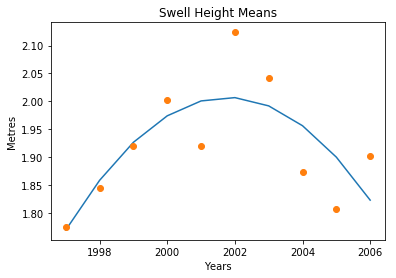

In [7]:
for x in range(0,len(df_names)):
    sh_means.append(df_names[x]['swell_height'].mean())
print sh_means

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sh_means

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Height Means")
plt.xlabel("Years")
plt.ylabel("Metres")

global_mean = df['swell_height'].mean()

[0.8787082244669987, 0.7349576983854028, 0.7111001155998419, 0.9511071527690054, 0.8658987420600366, 0.8121752297814147, 0.8783212116826495, 0.8705743425179504, 0.8316369921141127, 0.878890061652658]


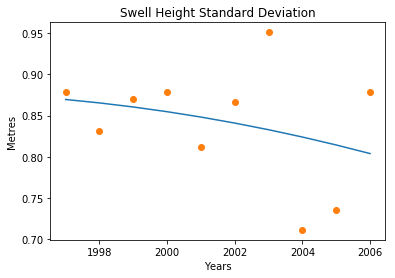

In [8]:
for x in range(0,len(df_names)):
    sh_stddevs.append(df_names[x]['swell_height'].std())
print sh_stddevs

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sh_stddevs

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Height Standard Deviation")
plt.xlabel("Years")
plt.ylabel("Metres")

global_stddev = df['swell_height'].std()

[0.6400800000000001, 0.45720000000000005, 0.57912, 0.36576000000000003, 0.6400800000000001, 0.54864, 0.54864, 0.67056, 0.45720000000000005, 0.45720000000000005]


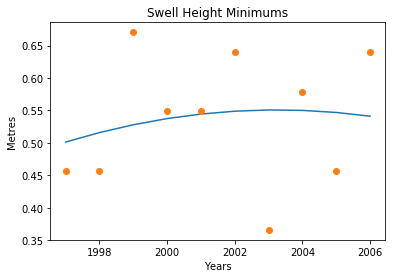

In [9]:
for x in range(0,len(df_names)):
    sh_mins.append(df_names[x]['swell_height'].min())
print sh_mins

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sh_mins

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Height Minimums")
plt.xlabel("Years")
plt.ylabel("Metres")

global_min = df['swell_height'].min()

[4.968240000000001, 5.1816, 5.24256, 6.67512, 5.638800000000001, 5.91312, 5.36448, 6.67512, 7.58952, 6.88848]


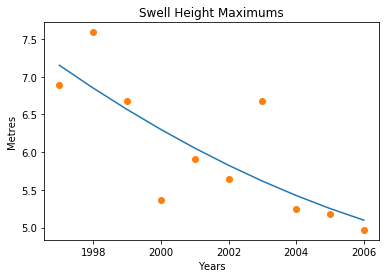

In [10]:
for x in range(0,len(df_names)):
    sh_maxes.append(df_names[x]['swell_height'].max())
print sh_maxes

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sh_maxes

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Height Maximums")
plt.xlabel("Years")
plt.ylabel("Metres")

global_max = df['swell_height'].max()

[0.7721281437459454, 0.5401628184159687, 0.5056633744061084, 0.9046048160483642, 0.7497806315011537, 0.6596286038704937, 0.7714481508916777, 0.7578996858505617, 0.6916200866526088, 0.7724477404718131]


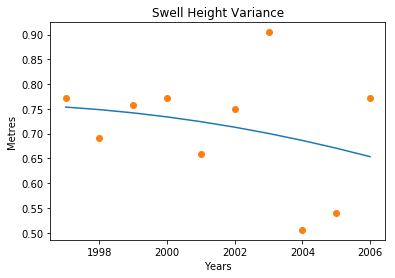

In [11]:
sh_var = []
for x in range(0,len(df_names)):
    sh_var.append(df_names[x]['swell_height'].var())
print sh_var

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sh_var

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Height Variance")
plt.xlabel("Years")
plt.ylabel("Metres")

global_stddev = df['swell_height'].var()

Text(0.5,1,'2006')

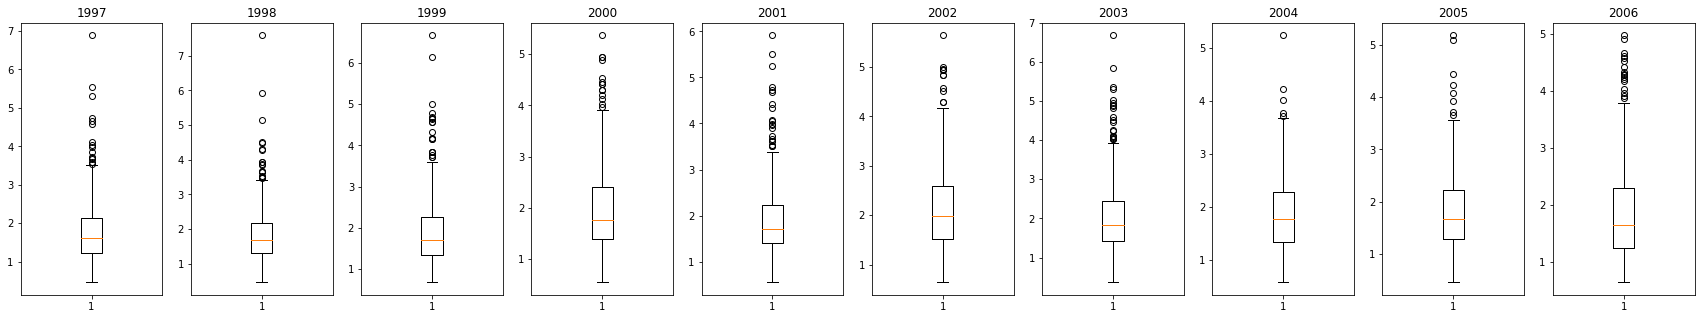

In [12]:
plt.figure(figsize=(30,5))

x1=plt.subplot(1,10,1)
x2=plt.subplot(1,10,2)
x3=plt.subplot(1,10,3)
x4=plt.subplot(1,10,4)
x5=plt.subplot(1,10,5)
x6=plt.subplot(1,10,6)
x7=plt.subplot(1,10,7)
x8=plt.subplot(1,10,8)
x9=plt.subplot(1,10,9)
x10=plt.subplot(1,10,10)

x1.boxplot(df_1997['swell_height'])
x2.boxplot(df_1998['swell_height'])
x3.boxplot(df_1999['swell_height'])
x4.boxplot(df_2000['swell_height'])
x5.boxplot(df_2001['swell_height'])
x6.boxplot(df_2002['swell_height'])
x7.boxplot(df_2003['swell_height'])
x8.boxplot(df_2004['swell_height'])
x9.boxplot(df_2005['swell_height'])
x10.boxplot(df_2006['swell_height'])

x1.set_title("1997")
x2.set_title("1998")
x3.set_title("1999")
x4.set_title("2000")
x5.set_title('2001')
x6.set_title("2002")
x7.set_title("2003")
x8.set_title("2004")
x9.set_title("2005")
x10.set_title("2006")

## Swell Period

#### Means

[9.947945205479453, 9.591780821917808, 9.948087431693988, 9.704109589041096, 10.291208791208792, 9.501369863013698, 10.07103825136612, 9.986301369863014, 9.794520547945206, 10.0]


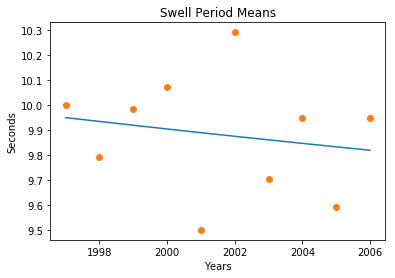

In [13]:
for x in range(0,len(df_names)):
    sp_means.append(df_names[x]['swell_period_secs'].mean())
print sp_means

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sp_means

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Period Means")
plt.ylabel("Seconds")
plt.xlabel("Years")

global_mean = df['swell_period_secs'].mean()

#### Standard Deviation

[2.817727904968802, 2.8795295624944557, 2.73185854805503, 3.01554754910684, 2.7996122656233733, 2.7840051960272683, 2.920007977782533, 2.706794212519064, 2.828227535404758, 2.856780360799679]


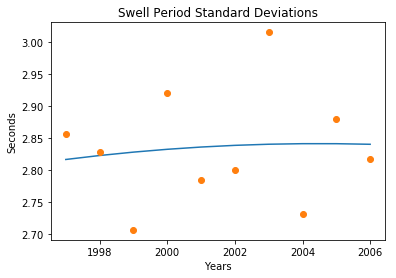

In [14]:
for x in range(0,len(df_names)):
    sp_stddevs.append(df_names[x]['swell_period_secs'].std())
print sp_stddevs

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sp_stddevs

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Period Standard Deviations")
plt.ylabel("Seconds")
plt.xlabel("Years")

global_mean = df['swell_period_secs'].std()

#### Minimum 

[4, 3, 4, 3, 3, 4, 4, 4, 3, 4]


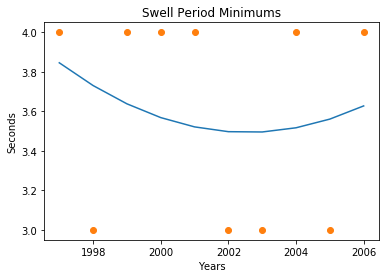

In [15]:
for x in range(0,len(df_names)):
    sp_mins.append(df_names[x]['swell_period_secs'].min())
print sp_mins

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sp_mins

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Period Minimums")
plt.ylabel("Seconds")
plt.xlabel("Years")


global_mean = df['swell_period_secs'].min()

#### Maximum 

[18, 20, 16, 17, 17, 17, 16, 20, 17, 18]


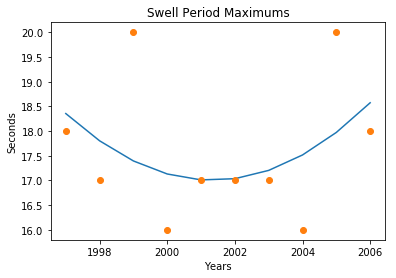

In [16]:
for x in range(0,len(df_names)):
    sp_maxes.append(df_names[x]['swell_period_secs'].max())
print sp_maxes

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sp_maxes

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Period Maximums")
plt.ylabel("Seconds")
plt.xlabel("Years")


global_mean = df['swell_period_secs'].max()

[7.939590546439876, 8.291690501279511, 7.463051126581338, 9.09352702092427, 7.837828837828837, 7.750684931506828, 8.526446590313638, 7.3267349089267, 7.998870992021671, 8.161194029850746]


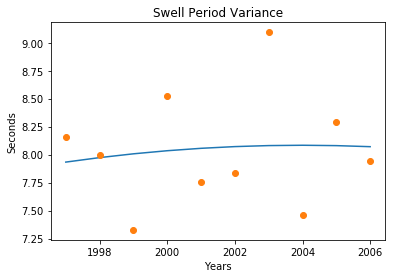

In [17]:
sp_var = []
for x in range(0,len(df_names)):
    sp_var.append(df_names[x]['swell_period_secs'].var())
print sp_var

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= sp_var

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Swell Period Variance")
plt.xlabel("Years")
plt.ylabel("Seconds")

global_sh = df['swell_period_secs'].var()

Text(0.5,1,'2006')

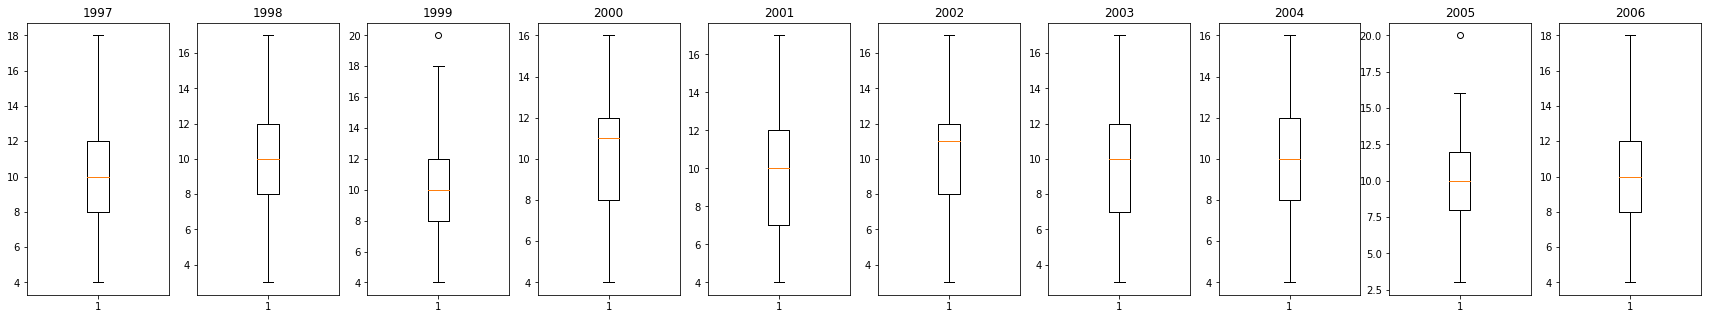

In [18]:
plt.figure(figsize=(30,5))

x1=plt.subplot(1,10,1)
x2=plt.subplot(1,10,2)
x3=plt.subplot(1,10,3)
x4=plt.subplot(1,10,4)
x5=plt.subplot(1,10,5)
x6=plt.subplot(1,10,6)
x7=plt.subplot(1,10,7)
x8=plt.subplot(1,10,8)
x9=plt.subplot(1,10,9)
x10=plt.subplot(1,10,10)

x1.boxplot(df_1997['swell_period_secs'])
x2.boxplot(df_1998['swell_period_secs'])
x3.boxplot(df_1999['swell_period_secs'])
x4.boxplot(df_2000['swell_period_secs'])
x5.boxplot(df_2001['swell_period_secs'])
x6.boxplot(df_2002['swell_period_secs'])
x7.boxplot(df_2003['swell_period_secs'])
x8.boxplot(df_2004['swell_period_secs'])
x9.boxplot(df_2005['swell_period_secs'])
x10.boxplot(df_2006['swell_period_secs'])

x1.set_title("1997")
x2.set_title("1998")
x3.set_title("1999")
x4.set_title("2000")
x5.set_title('2001')
x6.set_title("2002")
x7.set_title("2003")
x8.set_title("2004")
x9.set_title("2005")
x10.set_title("2006")


## Wind Speed  

#### Mean 

[11.964383561643835, 12.871232876712329, 13.642076502732241, 14.723287671232876, 14.398351648351648, 14.435616438356165, 15.1448087431694, 14.947945205479453, 14.852054794520548, 12.928571428571429]


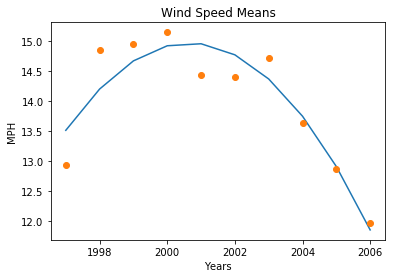

In [19]:
for x in range(0,len(df_names)):
    ws_means.append(df_names[x]['wind_speed_mph'].mean())
print ws_means

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= ws_means

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Wind Speed Means")
plt.ylabel("MPH")
plt.xlabel("Years")


global_mean = df['swell_period_secs'].mean()

#### StdDev 

[6.434910150397211, 6.574373313468762, 6.204309598507417, 6.450796878705329, 6.337443717125882, 5.949821538163369, 6.081033874023334, 5.771760296483745, 6.404842553010764, 5.68062581014475]


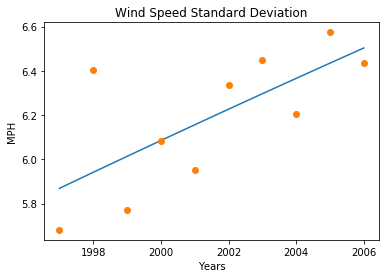

In [20]:
for x in range(0,len(df_names)):
    ws_stddevs.append(df_names[x]['wind_speed_mph'].std())
print ws_stddevs

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= ws_stddevs

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Wind Speed Standard Deviation")
plt.ylabel("MPH")
plt.xlabel("Years")

global_mean = df['wind_speed_mph'].std()

#### Minimum 

[2, 0, 2, 2, 2, 0, 2, 0, 0, 0]


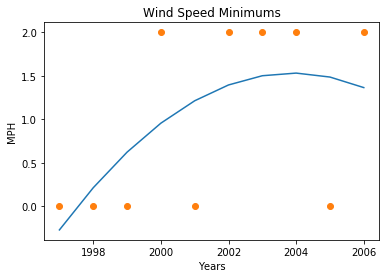

In [21]:
for x in range(0,len(df_names)):
    ws_mins.append(df_names[x]['wind_speed_mph'].min())
print ws_mins

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= ws_mins

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Wind Speed Minimums")
plt.ylabel("MPH")
plt.xlabel("Years")

global_mean = df['wind_speed_mph'].min()

#### Maximum 

[34, 31, 31, 31, 31, 31, 34, 31, 29, 31]


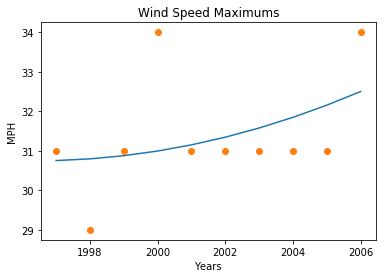

In [22]:
for x in range(0,len(df_names)):
    ws_maxes.append(df_names[x]['wind_speed_mph'].max())
print ws_maxes

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= ws_maxes

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Wind Speed Maximums")
plt.ylabel("MPH")
plt.xlabel("Years")

global_mean = df['wind_speed_mph'].max()

[41.408068643685056, 43.22238446485023, 38.493457594131264, 41.61278037031442, 40.16319286773832, 35.40037633599272, 36.97897297701924, 33.313216920066125, 41.022008128857436, 32.269509594882706]


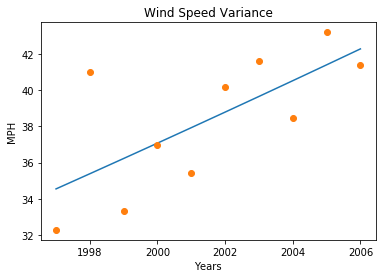

In [23]:
ws_var = []
for x in range(0,len(df_names)):
    ws_var.append(df_names[x]['wind_speed_mph'].var())
print ws_var

x=[2006,2005,2004,2003,2002,2001,2000,1999,1998,1997]
y= ws_var

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 2))(np.unique(x)))
plt.plot(x,y,"o")
plt.title("Wind Speed Variance")
plt.xlabel("Years")
plt.ylabel("MPH")

global_stddev = df['wind_speed_mph'].var()

{'boxes': [<matplotlib.lines.Line2D at 0x990f7b8>],
 'caps': [<matplotlib.lines.Line2D at 0x990fef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x991d908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x991d5c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x990f860>,
  <matplotlib.lines.Line2D at 0x990fba8>]}

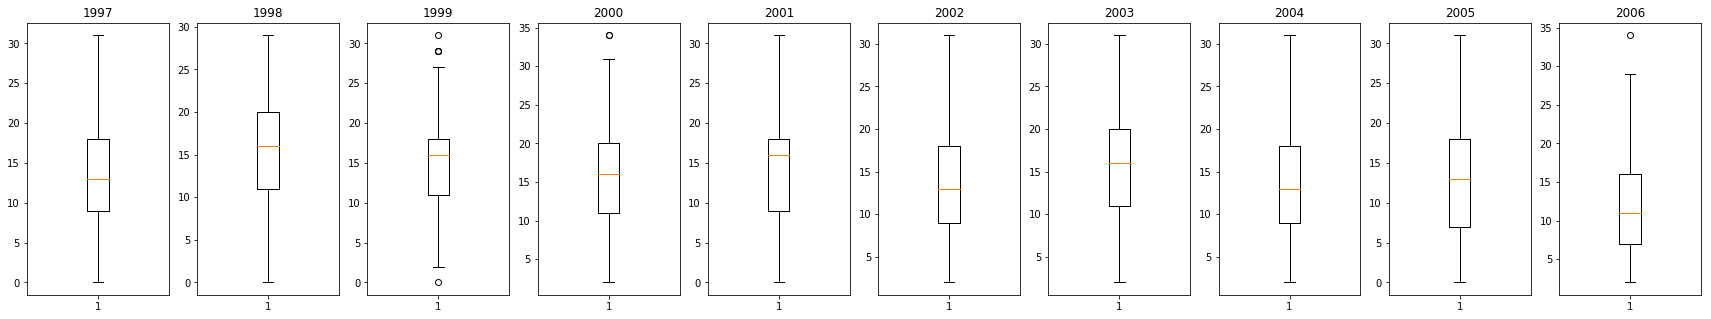

In [24]:
plt.figure(figsize=(30,5))
#plt.xticks(np.arange(0,365,30), rotation=20)

x1=plt.subplot(1,10,1)
x2=plt.subplot(1,10,2)
x3=plt.subplot(1,10,3)
x4=plt.subplot(1,10,4)
x5=plt.subplot(1,10,5)
x6=plt.subplot(1,10,6)
x7=plt.subplot(1,10,7)
x8=plt.subplot(1,10,8)
x9=plt.subplot(1,10,9)
x10=plt.subplot(1,10,10)

x1.set_title("1997")
x2.set_title("1998")
x3.set_title("1999")
x4.set_title("2000")
x5.set_title('2001')
x6.set_title("2002")
x7.set_title("2003")
x8.set_title("2004")
x9.set_title("2005")
x10.set_title("2006")

x1.boxplot(df_1997['wind_speed_mph'])
x2.boxplot(df_1998['wind_speed_mph'])
x3.boxplot(df_1999['wind_speed_mph'])
x4.boxplot(df_2000['wind_speed_mph'])
x5.boxplot(df_2001['wind_speed_mph'])
x6.boxplot(df_2002['wind_speed_mph'])
x7.boxplot(df_2003['wind_speed_mph'])
x8.boxplot(df_2004['wind_speed_mph'])
x9.boxplot(df_2005['wind_speed_mph'])
x10.boxplot(df_2006['wind_speed_mph'])


# Plot Variables Against Time (Check for Seasonality)

Text(0.5,1,'Swell Height Development Over Time')

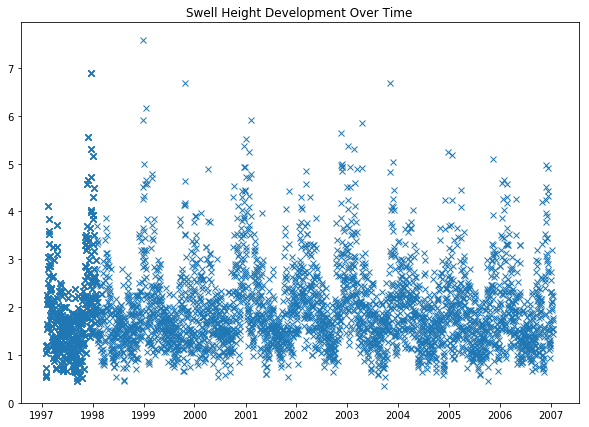

In [25]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

#Swell Height
plt.figure(figsize=(10,7))
axis_1 = plt.subplot(111)

axis_1.plot(df['times'],df['swell_height'],"x", label = "swell_height")
plt.title("Swell Height Development Over Time", fontsize=12)

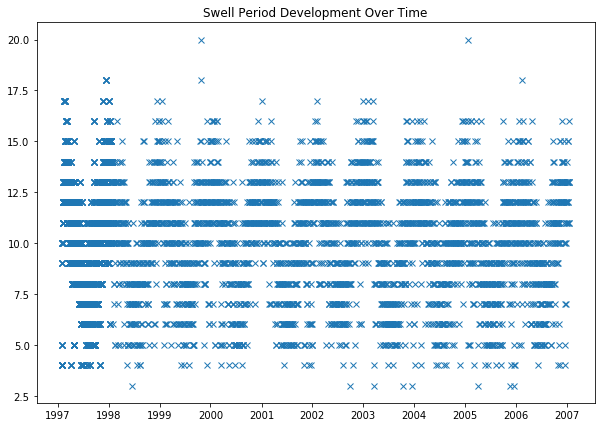

In [26]:
#Swell Period
plt.figure(figsize=(10,7))
axis_1 = plt.subplot(111)
plt.title("Swell Period Development Over Time", fontsize = 12)
axis_1.plot(df['times'],df['swell_period_secs'],"x", label = "swell_height")

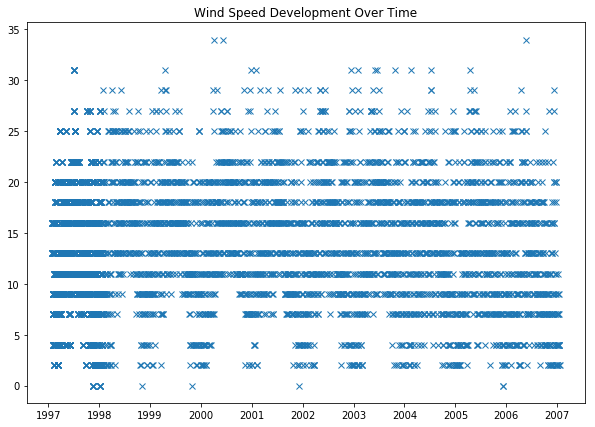

In [27]:
#Swell Height
plt.figure(figsize=(10,7))
axis_1 = plt.subplot(111)
plt.title("Wind Speed Development Over Time")
axis_1.plot(df['times'],df['wind_speed_mph'],"x", label = "swell_height")

# Plot Variables Against Each Other to Visualise Possible Relationships

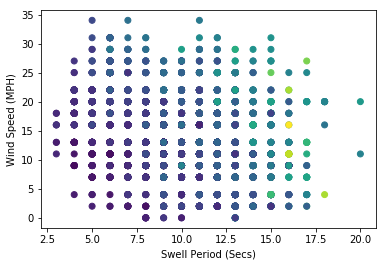

In [28]:
#plot windspeed, swell period, swell height
x,y,z = [],[],[]

x.append (df['swell_period_secs'])
y.append (df['wind_speed_mph'])
z.append (df['swell_height'])
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x,y,c=z)
plt.setp(ax, xlabel = "Swell Period (Secs)", ylabel = "Wind Speed (MPH)")
plt.show()


In [29]:
np.asarray(z)

array([[2.56032, 1.9812 , 1.8288 , ..., 2.19456, 2.19456, 2.19456]])

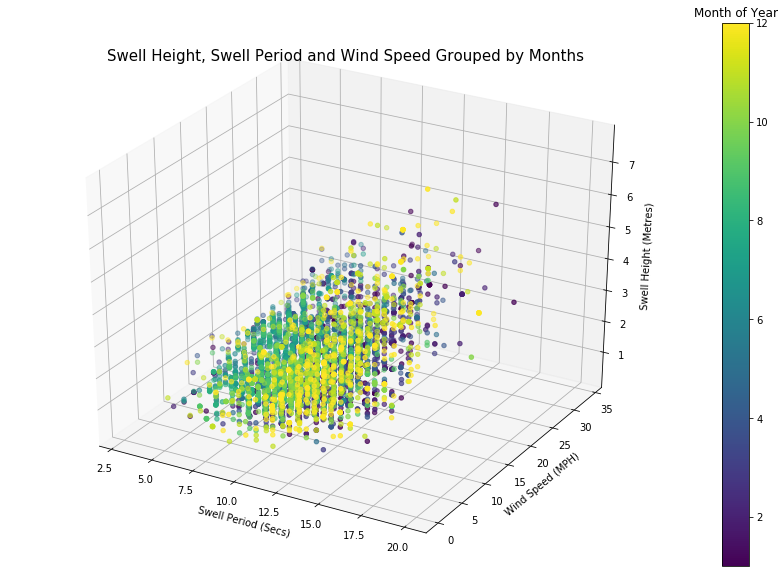

In [30]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
m = np.asarray(df['month'])
p1 = ax.scatter(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0],c=df['month'])
ax.set_xlabel("Swell Period (Secs)")
ax.set_ylabel("Wind Speed (MPH)")
ax.set_zlabel("Swell Height (Metres)")
plt.title("Swell Height, Swell Period and Wind Speed Grouped by Months", fontsize = 15)
b1 = plt.colorbar(p1)
b1.ax.set_title('Month of Year')

plt.show()

# Swell Height Scatter by Month and Year

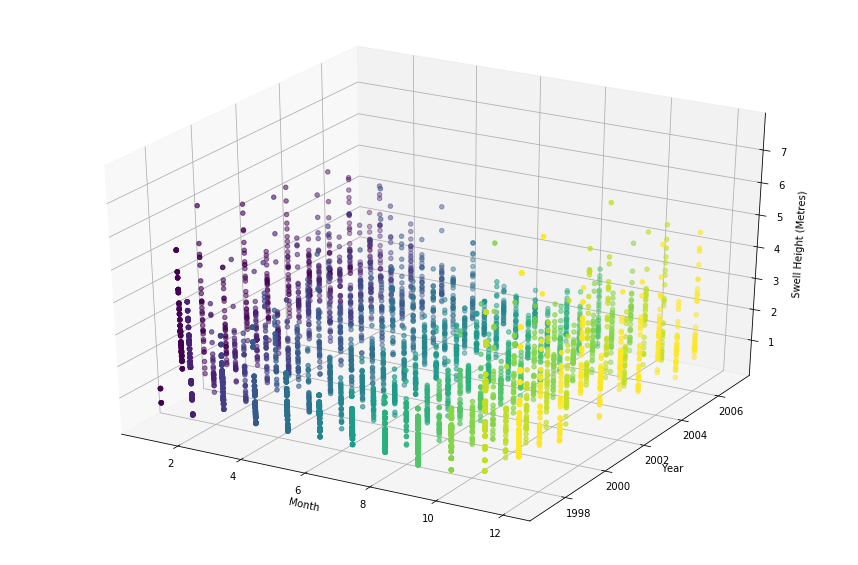

In [31]:
#Swell Height
x2,y2,z2 = [],[],[]

x2.append (df['month'])
y2.append (df['year'])
z2.append (df['swell_height'])

plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(x2)[0],np.asarray(y2)[0],np.asarray(z2)[0],c=df['month'])
#ax.plot_trisurf(np.asarray(x2)[0],np.asarray(y2)[0],np.asarray(z2)[0],)
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0],)
#ax.legend(m1)

ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.set_zlabel("Swell Height (Metres)")


plt.show()

# # Swell Period Scatter by Month and Year

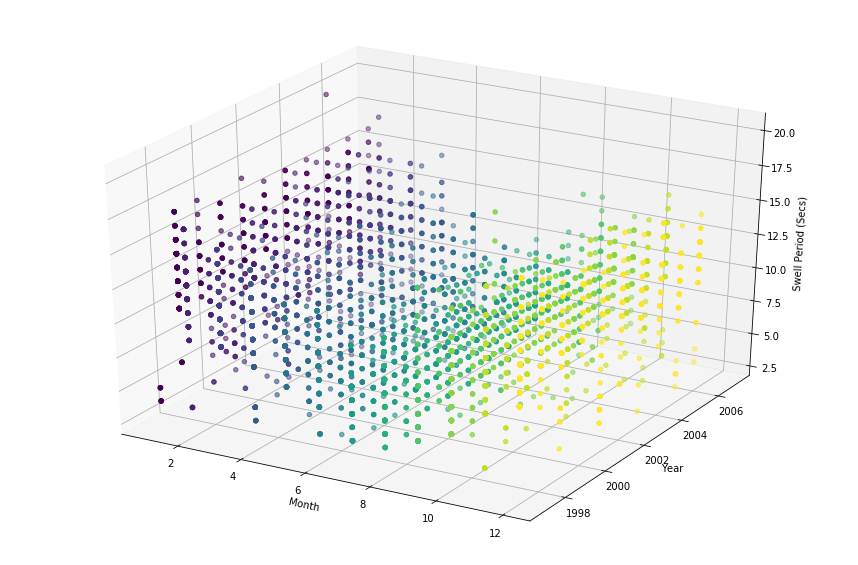

In [32]:
#Swell Height
x3,y3,z3 = [],[],[]

x3.append (df['month'])
y3.append (df['year'])
z3.append (df['swell_period_secs'])

plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(x3)[0],np.asarray(y3)[0],np.asarray(z3)[0],c=df['month'])
#ax.plot_trisurf(np.asarray(x2)[0],np.asarray(y2)[0],np.asarray(z2)[0],)
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0],)
#ax.legend(m1)

ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.set_zlabel("Swell Period (Secs)")

plt.show()

# Wind Speed Scatter by Month and Year

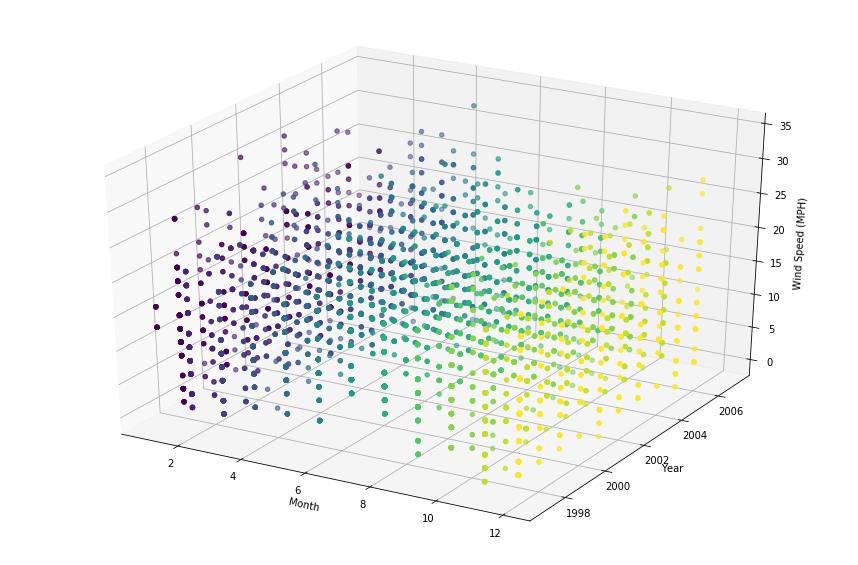

In [33]:
#Wind Speed
x4,y4,z4 = [],[],[]

x4.append (df['month'])
y4.append (df['year'])
z4.append (df['wind_speed_mph'])

plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(x4)[0],np.asarray(y4)[0],np.asarray(z4)[0],c=df['month'])
#ax.plot_trisurf(np.asarray(x2)[0],np.asarray(y2)[0],np.asarray(z2)[0],)
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0],)
#ax.legend(m1)


ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.set_zlabel("Wind Speed (MPH)")

plt.show()

# # Wind Direction Scatter by Month and Year

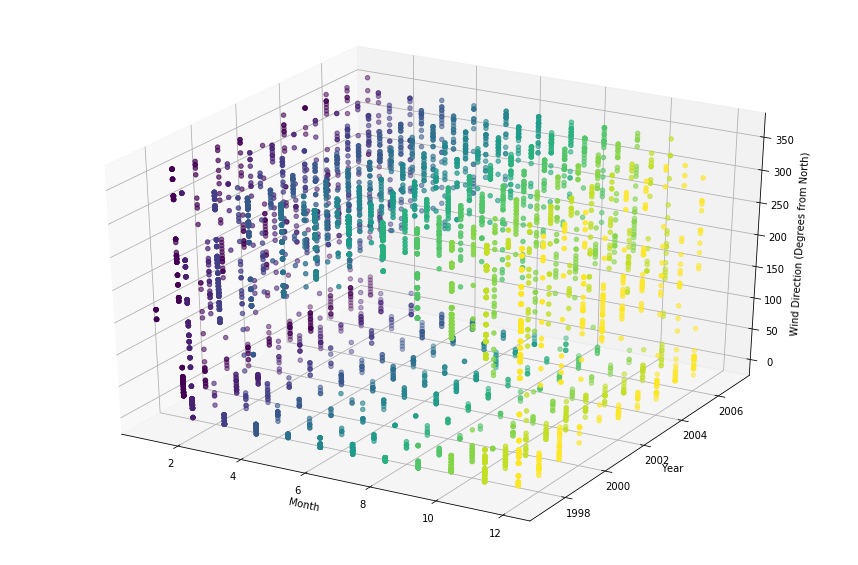

In [34]:
#Wind Speed
x5,y5,z5 = [],[],[]

x5.append (df['month'])
y5.append (df['year'])
z5.append (df['wind_dir'])

plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
p1 = ax.scatter(np.asarray(x5)[0],np.asarray(y5)[0],np.asarray(z5)[0],c=df['month'])
#ax.plot_trisurf(np.asarray(x2)[0],np.asarray(y2)[0],np.asarray(z2)[0],)
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0],)
#ax.legend(m1)

ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.set_zlabel("Wind Direction (Degrees from North)")

plt.show()

# # Swell Direction by Month and Year

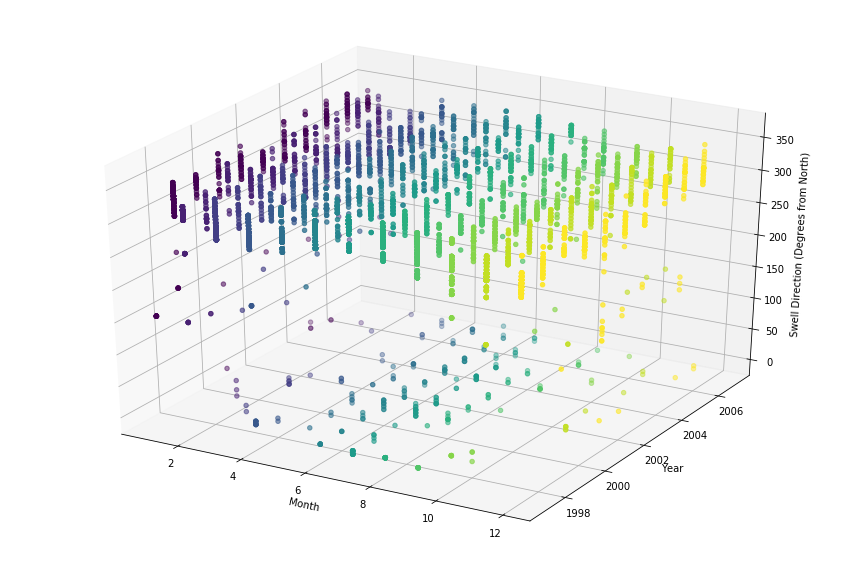

In [35]:
#Swell Direction 
x6,y6,z6 = [],[],[]

x6.append (df['month'])
y6.append (df['year'])
z6.append (df['swell_dir'])

plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter(np.asarray(x6)[0],np.asarray(y6)[0],np.asarray(z6)[0],c=df['month'])
#ax.plot_trisurf(np.asarray(x2)[0],np.asarray(y2)[0],np.asarray(z2)[0],)
#ax.plot_trisurf(np.asarray(x)[0],np.asarray(y)[0],np.asarray(z)[0],)
#ax.legend(m1)

ax.set_xlabel("Month")
ax.set_ylabel("Year")
ax.set_zlabel("Swell Direction (Degrees from North)")


plt.show()

# Wind Rose Diagram - Wind Speed and Wind Direction

In [36]:
from windrose import WindroseAxes
import matplotlib.cm as cm
# Windrose Diagram code https://media.readthedocs.org/pdf/windrose/latest/windrose.pdf
# Create wind speed and direction variables
ws = df['wind_speed_mph']
wd = df['wind_dir']

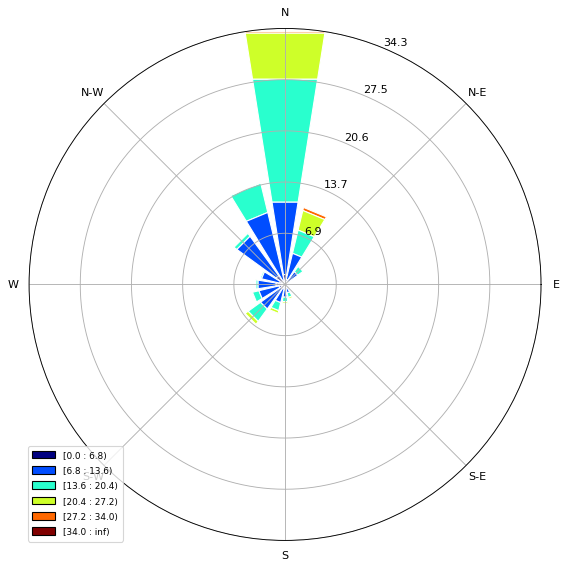

In [37]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Wind Rose Diagram - Swell Period and Swell Direction

In [38]:
# Create wind speed and direction variables
ws = df['swell_period_secs']
wd = df['swell_dir']

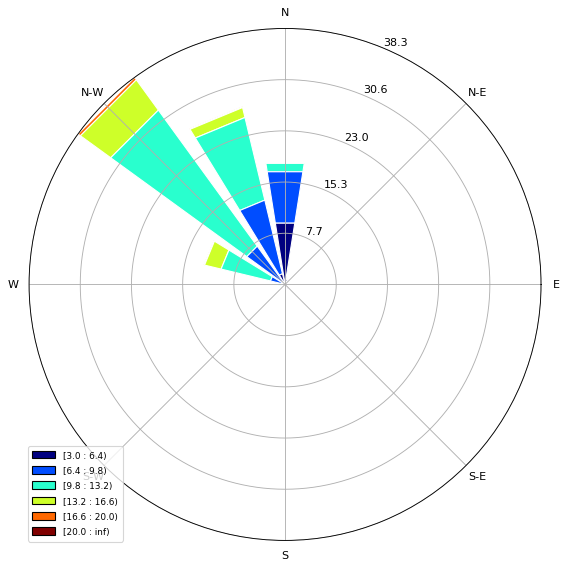

In [39]:
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Correlation Between Swell Period and Swell Height

Correlation between swell period and swell height:0.5438915012764869


Text(0.5,1,'Correlation Between Swell Period and Swell Height')

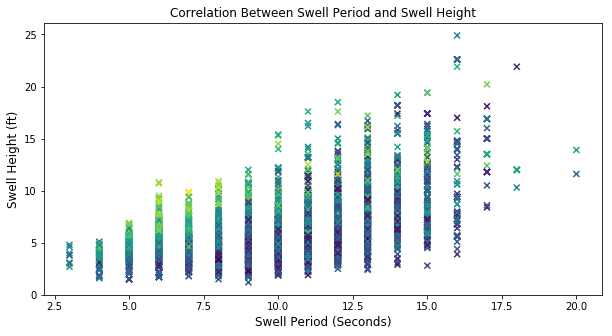

In [40]:
#correlation between swell height and swell period
plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.scatter(df['swell_period_secs'],df['swell_height_ft'],marker ='x', c= df['wind_speed_mph'])
plt.xlabel('Swell Period (Seconds)', fontsize = 12)
plt.ylabel('Swell Height (ft)', fontsize = 12)
correl = df['swell_period_secs'].corr(df['swell_height_ft'])
print "Correlation between swell period and swell height:" + str(correl)
plt.title("Correlation Between Swell Period and Swell Height")

### Yearly Development of Correlation

In [41]:
correlations = []
df_names = [df_2006,df_2005,df_2004,df_2003,df_2002,df_2001,df_2000,df_1999,df_1998,df_1997]

In [42]:
def plot_correlation_ph(dset,axis_name):
    x = dset['swell_period_secs']
    y = dset['swell_height']
    z = dset['wind_speed_mph']
    axis_name.scatter(x,y, marker = 'x',c=z)
    plt.setp(axis_name,xlabel = 'Swell Period (Seconds)',ylabel ='Swell Height (ft)')
    correlations.append(x.corr(y))

Text(0.5,1,'1997')

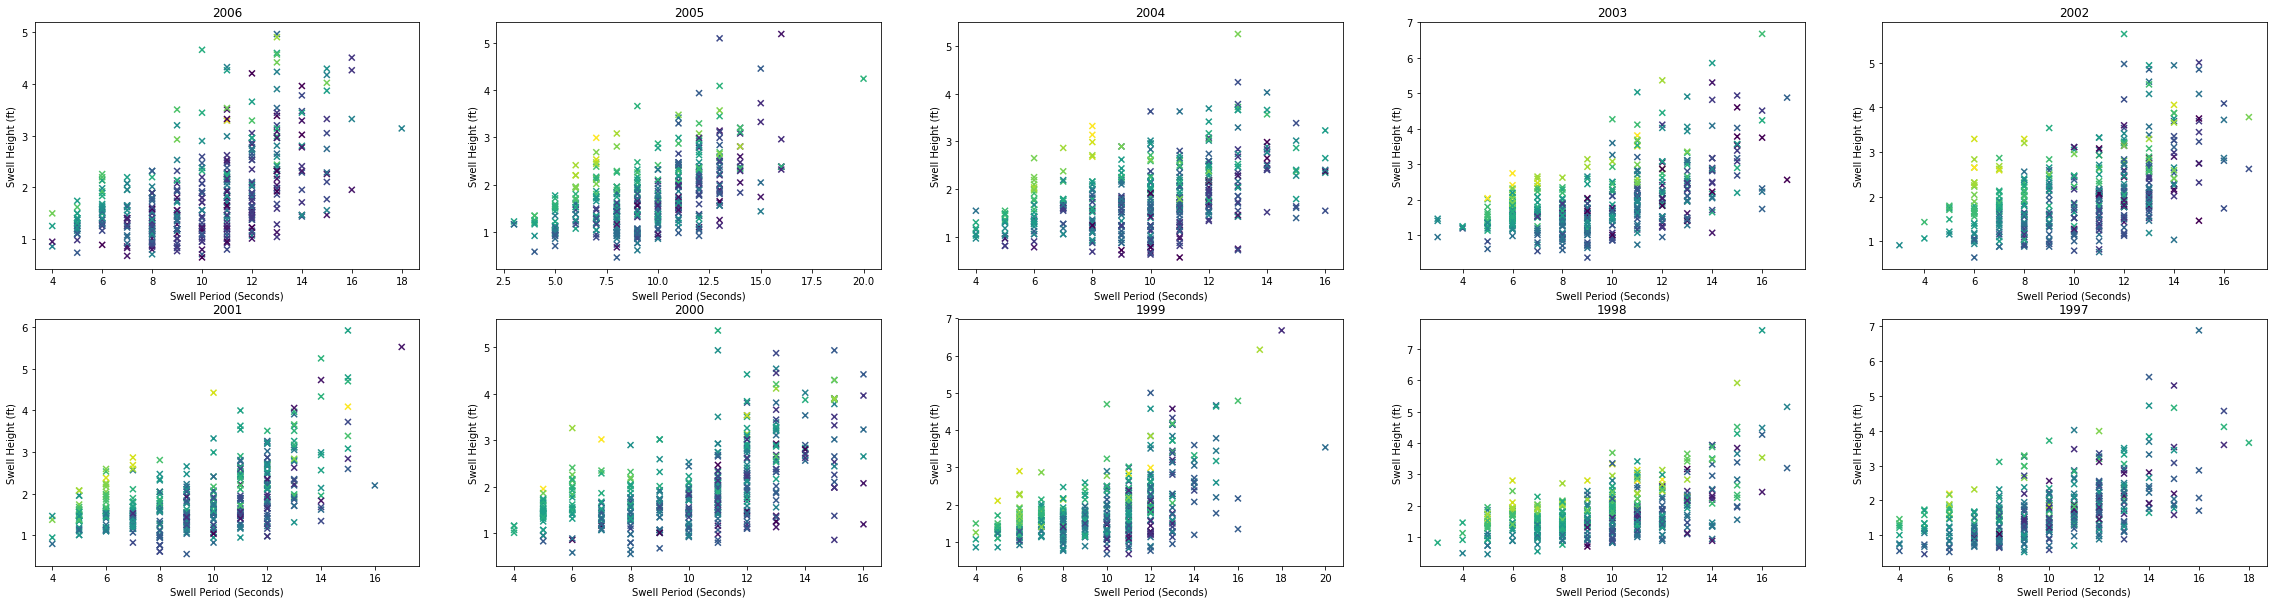

In [43]:
#correlation between swell height and swell period
plt.figure(figsize=(40,10))
ax1=plt.subplot(251)
ax2=plt.subplot(252)
ax3=plt.subplot(253)
ax4=plt.subplot(254)
ax5=plt.subplot(255)
ax6=plt.subplot(256)
ax7=plt.subplot(257)
ax8=plt.subplot(258)
ax9=plt.subplot(259)
ax10=plt.subplot(2,5,10)

ax_names = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10]

for i in range(0,len(df_names)):
    plot_correlation_ph(df_names[i],ax_names[i])

ax1.set_title('2006')
ax2.set_title('2005')
ax3.set_title('2004')
ax4.set_title('2003')
ax5.set_title('2002')
ax6.set_title('2001')
ax7.set_title('2000')
ax8.set_title('1999')
ax9.set_title('1998')
ax10.set_title('1997')

In [44]:
#print table of correlations
for i in range(0,len(correlations)):
    print correlations[i]

0.5349233332324155
0.5472971548585138
0.45107828887039825
0.5431782613052842
0.5056124258175655
0.5315967572394413
0.538592403775055
0.5246725522965193
0.5324110707602489
0.5593627224570493


# Correlation between Wind Speed and Swell Height

Correlation:0.1374947597171951


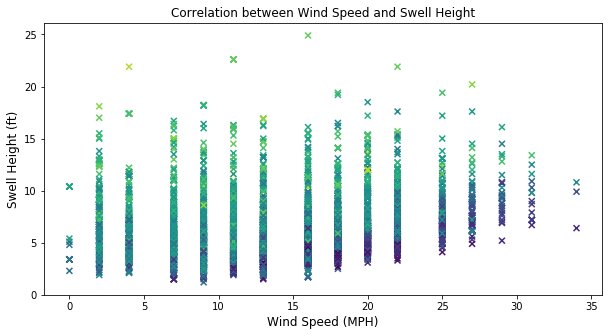

In [45]:
fig2 = plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.scatter(df['wind_speed_mph'],df['swell_height_ft'],marker='x',c=df['swell_period_secs'])
plt.xlabel('Wind Speed (MPH)', fontsize = 12)
plt.ylabel('Swell Height (ft)', fontsize = 12)
correl = df['wind_speed_mph'].corr(df['swell_height_ft'])
plt.title("Correlation between Wind Speed and Swell Height")

print "Correlation:" + str(correl)


### Yearly development

In [46]:
correlations_wh = []
def plot_correlation_wh(dset,axis_name):
    x = dset['wind_speed_mph']
    y = dset['swell_height']
    z = dset['swell_period_secs']
    axis_name.scatter(x,y, marker = 'x',c = z)
    plt.setp(axis_name,xlabel = 'Wind Speed (MPH)',ylabel ='Swell Height (ft)')
    correlations_wh.append(x.corr(y))

Text(0.5,1,'1997')

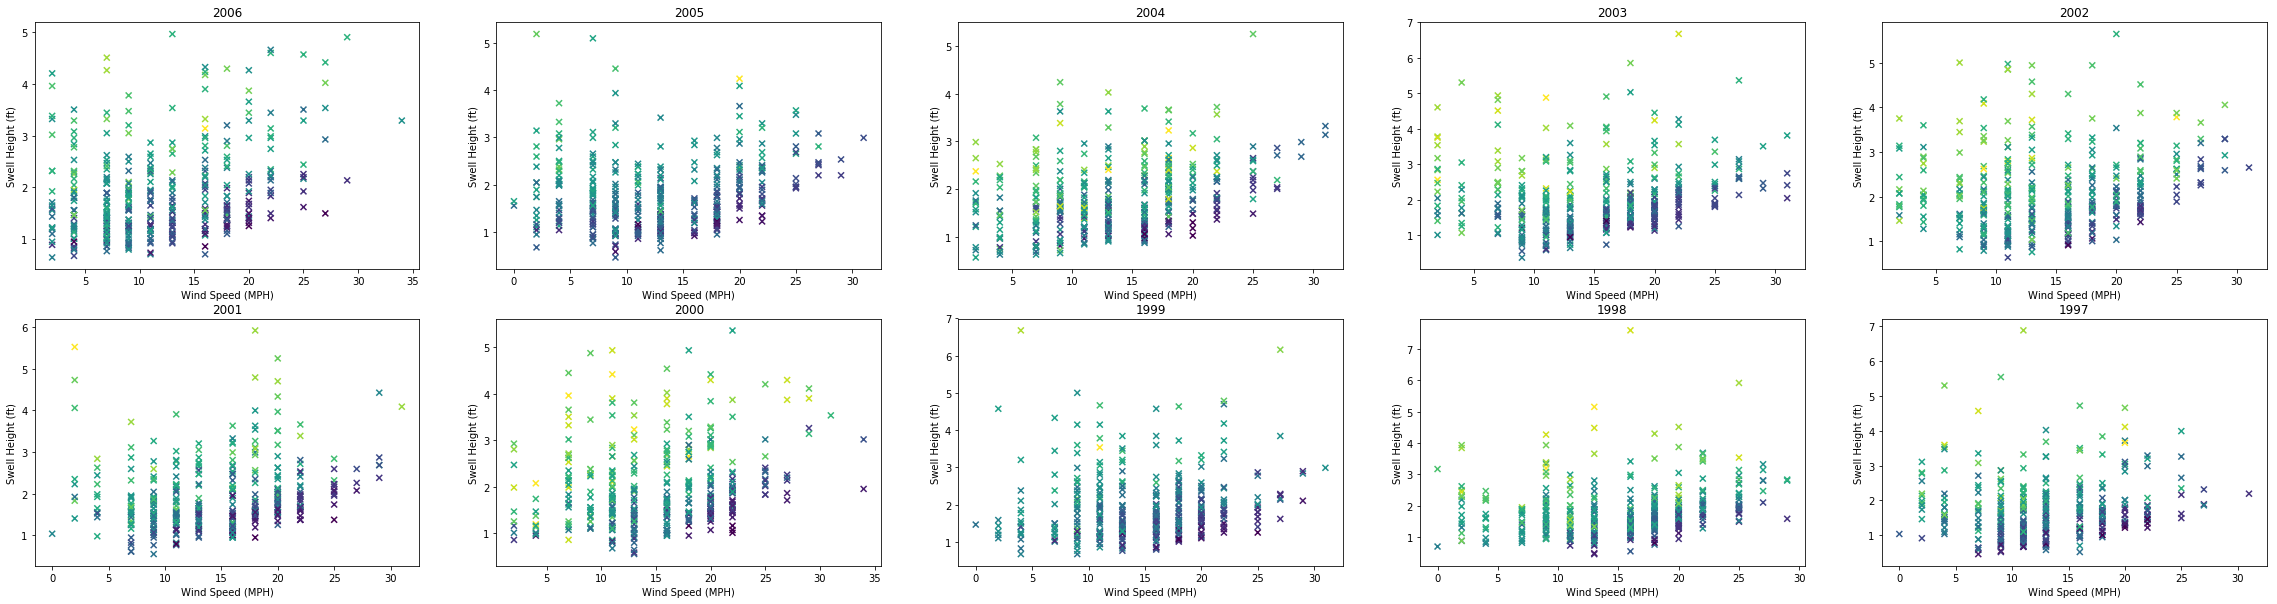

In [47]:
plt.figure(figsize=(40,10))
bx1=plt.subplot(251)
bx2=plt.subplot(252)
bx3=plt.subplot(253)
bx4=plt.subplot(254)
bx5=plt.subplot(255)
bx6=plt.subplot(256)
bx7=plt.subplot(257)
bx8=plt.subplot(258)
bx9=plt.subplot(259)
bx10=plt.subplot(2,5,10)

ax_names = [bx1,bx2,bx3,bx4,bx5,bx6,bx7,bx8,bx9,bx10]

for i in range(0,len(df_names)):
    plot_correlation_wh(df_names[i],ax_names[i])
bx1.set_title('2006')
bx2.set_title('2005')
bx3.set_title('2004')
bx4.set_title('2003')
bx5.set_title('2002')
bx6.set_title('2001')
bx7.set_title('2000')
bx8.set_title('1999')
bx9.set_title('1998')
bx10.set_title('1997')

In [48]:
#print table of correlations
for i in range(0,len(correlations_wh)):
    print correlations_wh[i]

0.29340248527911317
0.16291261940363186
0.33512142674371137
0.1301978081350215
0.15639423327458285
0.2088043018880156
0.19858302085920077
0.10550988927336571
0.18485887070739362
0.07661814647531387


# Correlation Between Wind Speed and Swell Period

Correlation:-0.32321319640863333


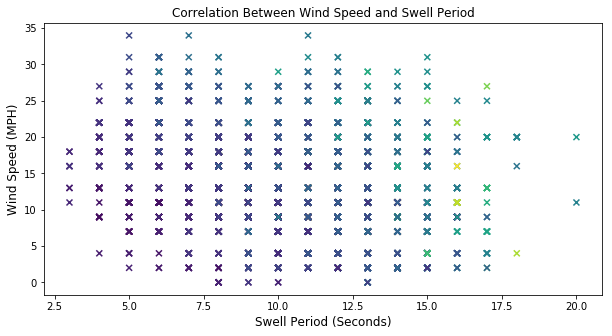

In [49]:
#correlation between wind speed and swell period
plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.scatter(df['swell_period_secs'],df['wind_speed_mph'],marker ='x', c = df['swell_height'])
plt.xlabel('Swell Period (Seconds)', fontsize = 12)
plt.ylabel('Wind Speed (MPH)', fontsize = 12)
correl = df['swell_period_secs'].corr(df['wind_speed_mph'])
plt.title("Correlation Between Wind Speed and Swell Period")

print "Correlation:" + str(correl)

In [50]:
correlations_wp = []
def plot_correlation_wp(dset,axis_name):
    x = dset['swell_period_secs']
    y = dset['wind_speed_mph']
    z = dset['swell_height']
    axis_name.scatter(x,y, marker = 'x',c = z)
    plt.setp(axis_name,xlabel = 'Swell Period (Secs)',ylabel ='Wind Speed (MPH)')
    correlations_wp.append(x.corr(y))

Text(0.5,1,'1997')

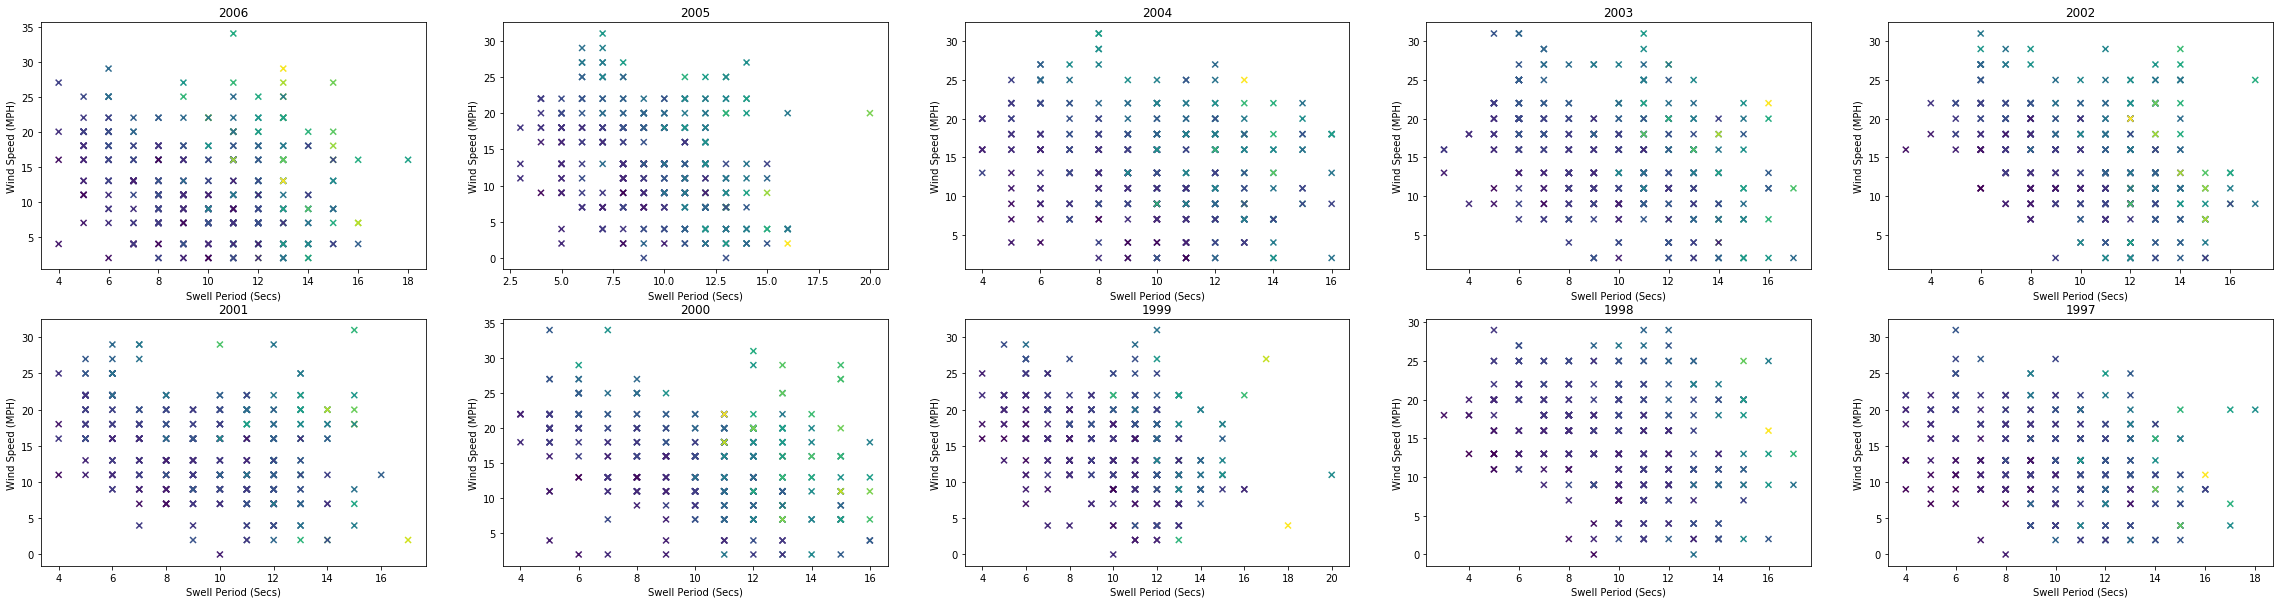

In [51]:
plt.figure(figsize=(40,10))
cx1=plt.subplot(251)
cx2=plt.subplot(252)
cx3=plt.subplot(253)
cx4=plt.subplot(254)
cx5=plt.subplot(255)
cx6=plt.subplot(256)
cx7=plt.subplot(257)
cx8=plt.subplot(258)
cx9=plt.subplot(259)
cx10=plt.subplot(2,5,10)

cx_names = [cx1,cx2,cx3,cx4,cx5,cx6,cx7,cx8,cx9,cx10]

for i in range(0,len(df_names)):
    plot_correlation_wp(df_names[i],cx_names[i])

cx1.set_title('2006')
cx2.set_title('2005')
cx3.set_title('2004')
cx4.set_title('2003')
cx5.set_title('2002')
cx6.set_title('2001')
cx7.set_title('2000')
cx8.set_title('1999')
cx9.set_title('1998')
cx10.set_title('1997')

In [52]:
#print table of correlations
for i in range(0,len(correlations_wp)):
    print correlations_wp[i]

-0.20510300992387429
-0.32872038760569744
-0.24437116760849076
-0.39316092545776504
-0.3809068671971319
-0.3218748369399368
-0.3650205224219757
-0.37583091748815894
-0.3382200499608709
-0.3025854639797061


# Other Correlations 

#### Below are some other variable correlations that was thought to contain possible relationships. However, based on the graphs, no meaningful relationships exist between these variables.

Correlation:0.16154707065304674


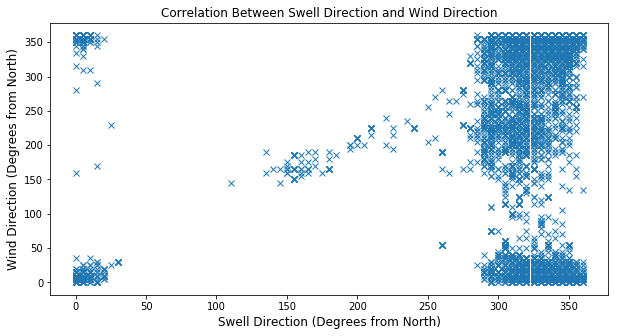

In [53]:
#correlation between Swell Direction and Wind Direction
plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.plot(df['swell_dir'],df['wind_dir'],'x')
plt.xlabel('Swell Direction (Degrees from North)', fontsize = 12)
plt.ylabel('Wind Direction (Degrees from North)', fontsize = 12)
correl = df['swell_dir'].corr(df['wind_dir'])
plt.title("Correlation Between Swell Direction and Wind Direction")

print "Correlation:" + str(correl)

Correlation:0.04799114625998074


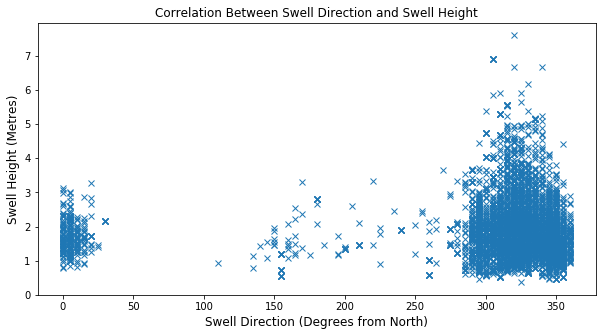

In [54]:
#correlation between Swell Direction and Swell Height
plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.plot(df['swell_dir'],df['swell_height'],'x')
plt.xlabel('Swell Direction (Degrees from North)', fontsize = 12)
plt.ylabel('Swell Height (Metres)', fontsize = 12)
correl = df['swell_dir'].corr(df['swell_height'])
plt.title("Correlation Between Swell Direction and Swell Height")

print "Correlation:" + str(correl)

Correlation:0.3094625454228299


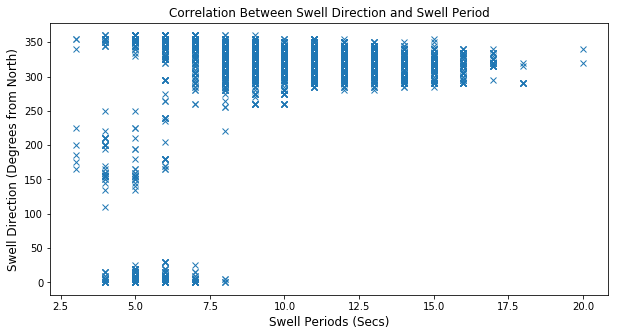

In [55]:
#correlation between Swell Direction and Swell Period
plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.plot(df['swell_period_secs'],df['swell_dir'],'x')
plt.xlabel('Swell Periods (Secs)', fontsize = 12)
plt.ylabel('Swell Direction (Degrees from North)', fontsize = 12)
correl = df['swell_period_secs'].corr(df['swell_dir'])
plt.title("Correlation Between Swell Direction and Swell Period")

print "Correlation:" + str(correl)

Correlation:-0.10906180633655099


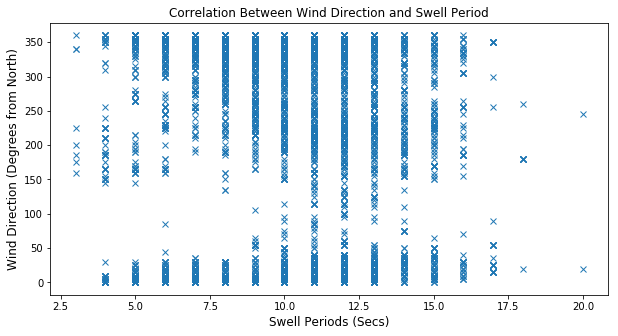

In [56]:
#correlation between Wind Direction and Swell Period
plt.figure(figsize=(10,5))
ax=plt.subplot(111)

plt.plot(df['swell_period_secs'],df['wind_dir'],'x')
plt.xlabel('Swell Periods (Secs)', fontsize = 12)
plt.ylabel('Wind Direction (Degrees from North)', fontsize = 12)
correl = df['swell_period_secs'].corr(df['wind_dir'])
plt.title("Correlation Between Wind Direction and Swell Period")

print "Correlation:" + str(correl)